# Plotting with Matplotlib and NumPy

[Matplotlib](http://matplotlib.org/) is a python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms.

Before we begin plotting, we must activate the PyLab module:

In [35]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/opt/conda/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['axes']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


If you want to use matplotlib and numpy from your script and not from the ipython notebook you can:

In [36]:
import matplotlib
import numpy as np

Let's create some artifical data:

In [40]:
x = linspace(0.01, 20, 20)
y = x ** 5

Plot is as easy as this:

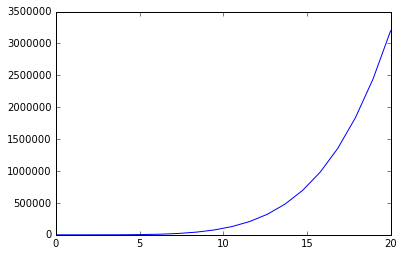

In [8]:
plot(x, y)

Line style and labels are controlled in a way similar to Matlab:

In [9]:
plot(x, y, 'r--o')
xlabel('x')
ylabel('y')
title('My first nice plot with dots')

Make it more fancy, like xkcd plots! http://xkcd.com/1299/
Hint: For the xkcd style you need a recent matplotlib version, but it's worth it.

/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['Humor Sans', 'Comic Sans MS'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


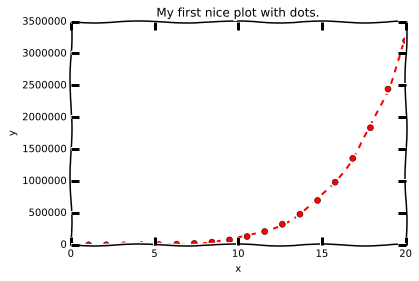

In [10]:
with xkcd():
    plot(x, y, 'r--o')
    xlabel('x')
    ylabel('y')
    title('My first nice plot with dots.')

You can plot several individual lines at once:

In [11]:
plot(x, y, 'r--o', x, y ** 1.1, 'bs', x, y ** 1.2, 'g^-' )

### Exercise 1

1. Plot the above graph with the y-axis on a log scale.
2. Limit the x axis range to between 2 and 6.
3. Label the axes with something descriptive and give the plot a fun title.

In [12]:
plot(x, y, 'r--o', x, y ** 1.1, 'bs', x, y ** 1.2, 'g^-' )

One more example:

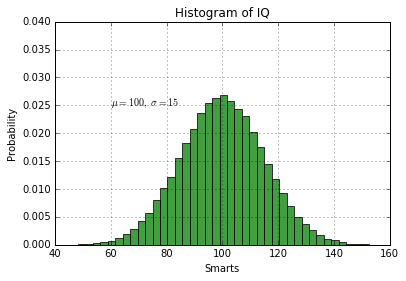

In [13]:
mu, sigma = 100, 15
x = mu + sigma * np.random.randn(100000)

# the histogram of the data
n, bins, patches = plt.hist(x, 50, normed=1, facecolor='g', alpha=0.75)

xlabel('Smarts')
ylabel('Probability')
title('Histogram of IQ')
text(60, .025, r'$\mu=100,\ \sigma=15$')
axis([40, 160, 0, 0.04])
grid(True)

If you feel a bit playful (only in matplotlib > 1.3):

In [14]:
with xkcd():
    x = np.linspace(0, 1)
    y = np.sin(4 * np.pi * x) * np.exp(-5 * x)

    plt.fill(x, y, 'r')
    plt.grid(True)

/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['Humor Sans', 'Comic Sans MS'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Following example is from [matplotlib - 2D and 3D plotting in Python](http://nbviewer.ipython.org/urls/raw.github.com/jrjohansson/scientific-python-lectures/master/Lecture-4-Matplotlib.ipynb) - great place to start for people interested in matplotlib.


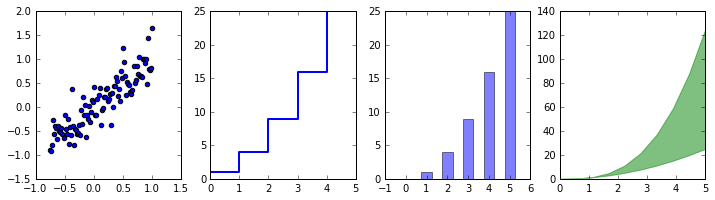

In [15]:
n = array([0,1,2,3,4,5])
xx = np.linspace(-0.75, 1., 100)
x = linspace(0, 5, 10)

fig, axes = plt.subplots(1, 4, figsize=(12,3))
axes[0].scatter(xx, xx + 0.25*randn(len(xx)))
axes[1].step(n, n**2, lw=2)
axes[2].bar(n, n**2, align='center', width=0.5, alpha=0.5)
axes[3].fill_between(x, x**2, x**3, color='green', alpha=0.5)

When you going to plot something more or less complicated in Matplotlib, the first thing you do is open the [Matplotlib example gallery](http://matplotlib.org/gallery.html) and choose example closest to your case.

You can directly load python code (or basically any text file) to the notebook. This time we download code from the Matplotlib example gallery:

In [16]:
# %load http://matplotlib.org/mpl_examples/mplot3d/contour3d_demo2.py

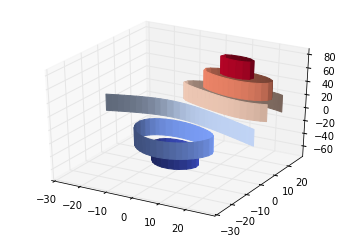

In [42]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm

fig = plt.figure()
ax = fig.gca(projection='3d')
X, Y, Z = axes3d.get_test_data(0.05)
cset = ax.contour(X, Y, Z, extend3d=True, cmap=cm.coolwarm)
ax.clabel(cset, fontsize=9, inline=1)

plt.show()

### Exercise 2

Choose one of the many code snippets on the [matplotlib gallery](http://matplotlib.org/examples/index.html) and load it into this notebook. Generate new data and have the code snippet visualize that data.

### Exercise 3: Gene Prediction

After having sequenced a genome and having obtained a high quality resolution of its DNA sequence,
one of the initial tasks is to predict and annotate the protein-coding genes.

Protein coding regions of a DNA sequence are first transcribed into messenger RNA (mRNA) and
then translated into a protein. During this process, a codon of three DNA nucleotides is translated
to a single amino acid and joined together to form a polypeptide, i.e. a protein. The mRNA contains
signals for the ribosome telling it where to initiate and terminate translation, the sequence between
these two signals is the coding sequence (CDS). These CDS can also be called an open reading
frame (ORF). Such an open reading frame is a sequence that contains a start and a stop codon and
could be read by the ribosome, only if it is located on an mRNA. A single-stranded DNA sequence
contains of three reading frames, this means three possibilities of reading codons off the sequence,
starting from position one, two, and three. The codons are then just read as a consecutive sequence
of three nucleotides.

Given a fragment of DNA sequence ``S`` of n nucleotides, let S[i] denote the i-th nucleotide of sequence
S, for $$1 ≤ i ≤ n$$ 
Let also $$ S[i, . . . , j], i ≤ j$$
denote the fragment of S containing nucleotides
$$S[i], S[i + 1], . . . , S[j]$$
and 
$$S[i, . . . , i] = S[i]$$
With this notation, an open reading frame ORF is a fragment S[i, . . . , j], of length l = j − i + 1, such that S[i, . . . , i + 2] is the start codon ATG and S[j − 2, . . . , j] is one of the stop codons {TAA, TAG, TGA}.

$$
\begin{align*}
u_t(x,t) & = f(x,t) \\
u(x,0) & = u_0
\end{align*}
$$

The shortest known protein has 8 amino acids and so ORFs with fewer than 3 + 24 + 3 = 30 nucleotides cannot encode for a protein,
therefore l ≥ 30. Furthermore, there are no other stop codons in the ORF except for the one at
the end.

Bacteriophage φ-X174 was the first genome to be sequenced in 1977 by Fred Sanger and his team.
It is a small genome, consisting only of 5,386 nucleotides and is contained in a single-stranded
circular chromosome. You shall download its genome sequence from NCBI and use it as an example
to identify all ORFs and to identify which of these actually encode for real proteins. As this genome
is single stranded you only have to look at the 3 reading frames, of course you would have to look at
a further 3 reading frames in the reverse complement sequence if the genome were double-stranded,
as genes could lie on either strand.

Download the genome from NCBI, the accession number is NC 001422.1. How many genes are annotated?

Hint: You can download and ``open()`` the FASTA file like a normal text file or reading it directly from the FTP server with:

In [34]:
from urllib import request
url = "http://www.uniprot.org/uniprot/Q7T2N8.fasta"
data = request.urlopen( url )
for line in data:
    print(line.decode('utf-8'))

>tr|Q7T2N8|Q7T2N8_DANRE Foxi one OS=Danio rerio GN=foxi1 PE=4 SV=1

MSPFTACAPDRLNNPPLKRTRTLSLRNPSETSTLSRSDRRNSMFLEGERIMNAFGQQPSS

QQTSPLQQQDILDMTVYCDSNFSMYQQNLHHHHHHHHHQRPPAHPSGYGLGEYSSPSTNP

YLWMNSPGITSTPYLSSPNGGSYIQSGFGSNQRQFLPPPTGFGSADLGWLSISSQQELFK

MVRPPYSYSALIAMAIQNAQDKKLTLSQIYQYVADNFPFYKKSKAGWQNSIRHNLSLNDC

FKKVARDEDDPGKGNYWTLDPNCEKMFDNGNFRRKRKRRADGNAMSVKSEDALKLADTSS

LMSASPPSLQNSPTSSDPKSSPSPSAEHSPCFSNFIGNMNSIMSGNAVRSRDGSSAHLGD

FTQHGMSGHEISPPSEPGHLNTNRLNYYSASHNNSGLINSISNHFSVNNLIYNRDGSEV



Write a method that reads the genome sequence in fasta format, calculates all possible
ORFs, and returns a fasta file that contains the ORF DNA sequences and the reading frame
number, the starting position i, the ending position j and the length l of each in the header.
How many ORFs do you find in total and in each reading frame separately?

Why have we asked you to only look in 3 reading frames and not in 6 as is usually done (Hint:
please read our introduction)? What would it mean to look in 6 reading frames, how would you
define the other 3 reading frames?

Download all protein sequences annotated for Bacteriophage φ-X174 in one fasta file. Which
part of the genes correspond to the respective CDS? Can you find untranslated regions (UTRs)?

Write a method to translate all ORFs that are currently saved as DNA sequences
into protein sequences. Parse the real protein sequences and compare them to your predicted
sequences. Your output shall be a table of ORFs that correspond to real proteins giving the
protein accession number (NP...) they correspond to, the reading frame they are located on
with starting and ending positions (w.r.t. the genome) and length. Do you find all CDS? If not,
why is this?

In [73]:
codon_table = {
    'TTT': 'F', 'TTC': 'F', 'TTA': 'L', 'TTG': 'L', 'TCT': 'S',
    'TCC': 'S', 'TCA': 'S', 'TCG': 'S', 'TAT': 'Y', 'TAC': 'Y',
    'TGT': 'C', 'TGC': 'C', 'TGG': 'W', 'CTT': 'L', 'CTC': 'L',
    'CTA': 'L', 'CTG': 'L', 'CCT': 'P', 'CCC': 'P', 'CCA': 'P',
    'CCG': 'P', 'CAT': 'H', 'CAC': 'H', 'CAA': 'Q', 'CAG': 'Q',
    'CGT': 'R', 'CGC': 'R', 'CGA': 'R', 'CGG': 'R', 'ATT': 'I',
    'ATC': 'I', 'ATA': 'I', 'ATG': 'M', 'ACT': 'T', 'ACC': 'T',
    'ACA': 'T', 'ACG': 'T', 'AAT': 'N', 'AAC': 'N', 'AAA': 'K',
    'AAG': 'K', 'AGT': 'S', 'AGC': 'S', 'AGA': 'R', 'AGG': 'R',
    'GTT': 'V', 'GTC': 'V', 'GTA': 'V', 'GTG': 'V', 'GCT': 'A',
    'GCC': 'A', 'GCA': 'A', 'GCG': 'A', 'GAT': 'D', 'GAC': 'D',
    'GAA': 'E', 'GAG': 'E', 'GGT': 'G', 'GGC': 'G', 'GGA': 'G',
    'GGG': 'G'
}

Describe how you would extend your algorithm to be able to identify all protein sequences. From
this description it should be clear exactly how you can program this feature.

If you look at the location of the genes on the chromosome, what do you notice? What does
this observation have to do with the size? Name an advantage of reading frames.

Use your new plotting skills to plot the Codon usage of all predicted genes.